In [69]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

I imported the popular handwritten digits MNIST dataset

In [70]:
(X_train, Y_train) , (X_test, Y_test) = keras.datasets.mnist.load_data()

There are 60000 training datasets and 10000 test datasets

In [71]:
print(len(X_train))
print(len(X_test))

60000
10000


In [ ]:
Each dataset consists of pixel values of an image of 28 x 28 pixels

In [72]:
X_train[0].shape

(28, 28)

In [73]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
Representation of each image of handrwritten digits 

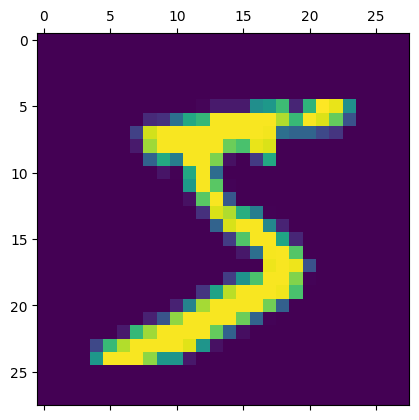

In [74]:
plt.matshow(X_train[0])

In [75]:
Y_train[0]

5

In [76]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Normalizing and flattening the training data before passing it through the neural network

In [77]:
X_train = X_train / 255
X_test = X_test / 255

In [78]:
X_train_flat = X_train.reshape(len(X_train), 28 * 28)
print(X_train_flat.shape)
X_test_flat = X_test.reshape(len(X_test), 28 * 28)
print(X_test_flat.shape)

(60000, 784)
(10000, 784)


In [79]:
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Building the Neural Network:

Built a simple neural network using Keras with an input and an output layer, with a sigmoid activation function. I did not add a hidden layer initially

In [80]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(X_train_flat, Y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4719 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3037 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 2s 877us/step - loss: 0.2666 - accuracy: 0.9256


In [81]:
model.evaluate(X_test_flat, Y_test)

313/313 [==============================] - 1s 907us/step - loss: 0.2756 - accuracy: 0.9238


[0.27561959624290466, 0.923799991607666]

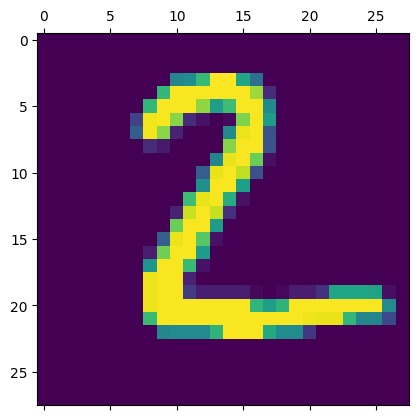

In [82]:
plt.matshow(X_test[1])

In [83]:
Y_pred = model.predict(X_test_flat)
Y_pred[1]

313/313 [==============================] - 0s 670us/step


array([5.6927890e-01, 5.2672443e-03, 9.9857527e-01, 4.0592429e-01,
       6.2827715e-10, 8.2398546e-01, 9.1577160e-01, 8.8093763e-13,
       1.6816844e-01, 2.1417241e-09], dtype=float32)

In [84]:
np.argmax(Y_pred[1])

2

In [85]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

Built a confusion matrix to check the performance of the model. The model is about 92% accurate.

In [86]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions = Y_pred_labels)

Text(95.72222222222221, 0.5, 'Truth')

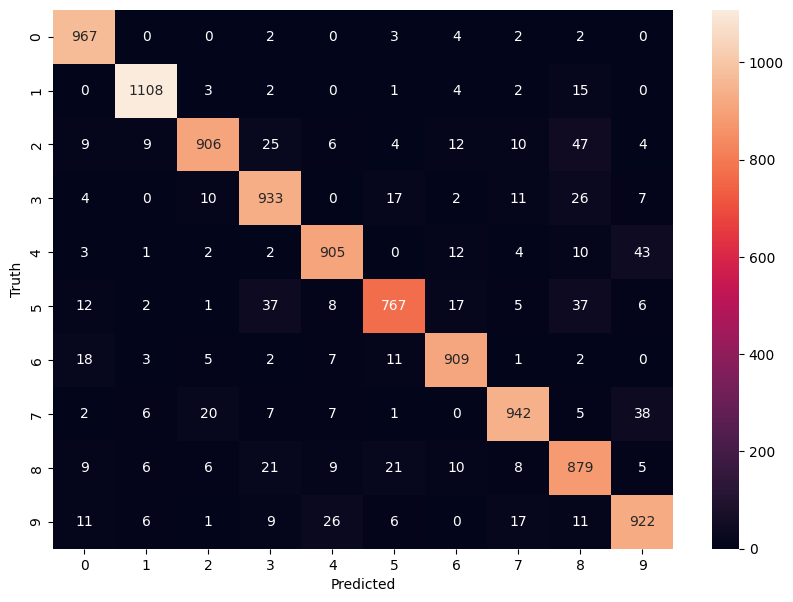

In [87]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now, I tried building another neural network with a hidden layer of 100 neurons and a ReLu activation function.

In [88]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(X_train_flat, Y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2677 - accuracy: 0.9246
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1168 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0822 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0626 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0494 - accuracy: 0.9851


In [89]:
model.evaluate(X_test_flat, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0762 - accuracy: 0.9767


[0.07617247849702835, 0.9767000079154968]

In [90]:
Y_pred = model.predict(X_test_flat)
Y_pred[1]

313/313 [==============================] - 0s 869us/step


array([7.8433477e-05, 9.6979588e-01, 9.9999905e-01, 3.7106693e-01,
       1.9917802e-13, 8.1562378e-02, 3.9693640e-04, 4.1929425e-07,
       2.2828647e-01, 6.0535193e-08], dtype=float32)

In [91]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

Created a confusion matrix for this neural network. The accuracy has increased to about 98%.

In [92]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions = Y_pred_labels)

Text(95.72222222222221, 0.5, 'Truth')

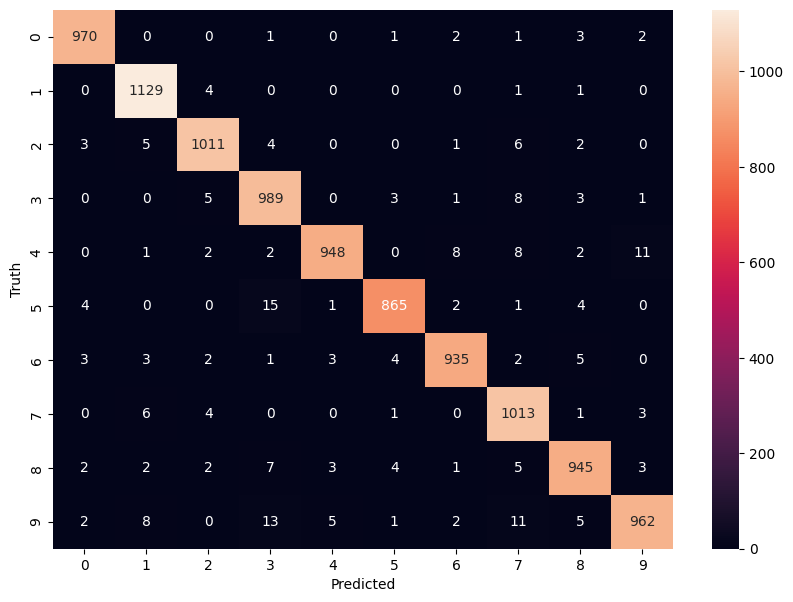

In [93]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')